In [1]:
import nlp
import torch

import os
import sys
import json

import transformers
from transformers import T5Tokenizer

In [27]:
arguments={}
arguments['dataset_name'] = "cosmos_qa"

train_dataset = nlp.load_dataset(arguments['dataset_name'], split = nlp.Split.TRAIN)
valid_dataset = nlp.load_dataset(arguments['dataset_name'], split = nlp.Split.VALIDATION)

Using custom data configuration default
Using custom data configuration default


In [4]:
valid_dataset

Dataset(features: {'id': Value(dtype='string', id=None), 'context': Value(dtype='string', id=None), 'question': Value(dtype='string', id=None), 'answer0': Value(dtype='string', id=None), 'answer1': Value(dtype='string', id=None), 'answer2': Value(dtype='string', id=None), 'answer3': Value(dtype='string', id=None), 'label': Value(dtype='int32', id=None)}, num_rows: 2985)

In [5]:
valid_dataset[0]

{'answer0': 'If he gets married in the church he wo nt have to get a divorce .',
 'answer1': 'He wants to get married to a different person .',
 'answer2': 'He wants to know if he does nt like this girl can he divorce her ?',
 'answer3': 'None of the above choices .',
 'context': 'Do i need to go for a legal divorce ? I wanted to marry a woman but she is not in the same religion , so i am not concern of the marriage inside church . I will do the marriage registered with the girl who i am going to get married . But legally will there be any complication , like if the other woman comes back one day , will the girl who i am going to get married now will be in trouble or Is there any complication ?',
 'id': '3BFF0DJK8XA7YNK4QYIGCOG1A95STE##3180JW2OT5AF02OISBX66RFOCTG5J7##A2LTOS0AZ3B28A##Blog_56156##q1_a1##378G7J1SJNCDAAIN46FM2P7T6KZEW2',
 'label': 1,
 'question': 'Why is this person asking about divorce ?'}

In [37]:
example = valid_dataset[1]

In [25]:

def format_example_cosmos_qa(example):
    option_dict = {   0: '%s: %s' % ('A', example['answer0'])
                    , 1: '%s: %s' % ('B', example['answer1'])
                    , 2: '%s: %s' % ('C', example['answer2'])
                    , 3: '%s: %s' % ('D', example['answer3'])}
    options = " ".join(option_dict.values())

    example['input_text'] = 'question: %s context: %s options: %s' % (example['question'], example['context'], options)

    label = example['label']
    example['target_text'] = option_dict[label]
    
    return example



In [26]:
format_example_cosmos_qa(valid_dataset[100])

{'answer0': "Since I made the recipe up , I did n't know the right measurements for waffles .",
 'answer1': 'None of the above choices .',
 'answer2': "Since I made the recipe up , I did n't know the right measurements for fried chicken .",
 'answer3': "Since I made the recipe up , I did n't know how to make fried chicken correctly .",
 'context': "Maybe I am on drugs . These waffles were very good ... and can you believe how dark the blueberries look ? I do n't know why they were so dark . I made this recipe up in my head , so I ' m surprised they turned out to well . Next time I make waffles , I ' m making fried chicken to go with them .",
 'id': '3NQUW096N8MG4KF7SHSY10P2HB4L9L##3XIQGXAUMFNADF6XH534NIP8KZ47XL##A3GVXFBYAU9HP##Blog_917445##q1_a2##3MDWE879UJG4RBTV1434NXTX5QJB9Z',
 'label': 0,
 'question': 'Why am I so surprised that the waffles turned out well ?',
 'input_text': "question: Why am I so surprised that the waffles turned out well ? context: Maybe I am on drugs . These waff

In [28]:
train_dataset = train_dataset.map(format_example_cosmos_qa, load_from_cache_file = False)

In [30]:
valid_dataset = valid_dataset.map(format_example_cosmos_qa, load_from_cache_file = False)

In [31]:
train_dataset[0]

{'answer0': 'None of the above choices .',
 'answer1': 'This person likes music and likes to see the show , they will see other bands play .',
 'answer2': 'This person only likes Good Old War and Person L , no other bands .',
 'answer3': 'Other Bands is not on tour and this person can not see them .',
 'context': "Good Old War and person L : I saw both of these bands Wednesday night , and they both blew me away . seriously . Good Old War is acoustic and makes me smile . I really can not help but be happy when I listen to them ; I think it 's the fact that they seemed so happy themselves when they played .",
 'id': '3Q9SPIIRWJKVQ8244310E8TUS6YWAC##34V1S5K3GTZMDUBNBIGY93FLDOB690##A1S1K7134S2VUC##Blog_1044056##q1_a1##3XU9MCX6VQQG7YPLCSAFDPQNH4GR20',
 'input_text': "question: In the future , will this person go to see other bands play ? context: Good Old War and person L : I saw both of these bands Wednesday night , and they both blew me away . seriously . Good Old War is acoustic and make

In [35]:
tokenizer = T5Tokenizer.from_pretrained("t5-base")

In [38]:
tokenizer.tokenize(example["input_text"])

['▁question',
 ':',
 '▁Why',
 '▁is',
 '▁',
 'he',
 '▁worried',
 '▁about',
 '▁getting',
 '▁married',
 '▁',
 '?',
 '▁context',
 ':',
 '▁Do',
 '▁',
 'i',
 '▁need',
 '▁to',
 '▁go',
 '▁for',
 '▁',
 'a',
 '▁legal',
 '▁divorce',
 '▁',
 '?',
 '▁I',
 '▁wanted',
 '▁to',
 '▁marry',
 '▁',
 'a',
 '▁woman',
 '▁but',
 '▁she',
 '▁is',
 '▁not',
 '▁in',
 '▁the',
 '▁same',
 '▁religion',
 '▁',
 ',',
 '▁so',
 '▁',
 'i',
 '▁am',
 '▁not',
 '▁concern',
 '▁of',
 '▁the',
 '▁marriage',
 '▁inside',
 '▁church',
 '▁',
 '.',
 '▁I',
 '▁will',
 '▁do',
 '▁the',
 '▁marriage',
 '▁registered',
 '▁with',
 '▁the',
 '▁girl',
 '▁who',
 '▁',
 'i',
 '▁am',
 '▁going',
 '▁to',
 '▁get',
 '▁married',
 '▁',
 '.',
 '▁But',
 '▁legally',
 '▁will',
 '▁there',
 '▁be',
 '▁any',
 '▁',
 'com',
 'plication',
 '▁',
 ',',
 '▁like',
 '▁',
 'if',
 '▁the',
 '▁other',
 '▁woman',
 '▁comes',
 '▁back',
 '▁one',
 '▁day',
 '▁',
 ',',
 '▁will',
 '▁the',
 '▁girl',
 '▁who',
 '▁',
 'i',
 '▁am',
 '▁going',
 '▁to',
 '▁get',
 '▁married',
 '▁now',
 '▁will',
 '

In [67]:
lengths = []
max_len = 0
max_len_eg = ""

targ_lengths = []
max_targ_len = 0
max_targ_eg = ""

for example in train_dataset:
    inputlen = len(tokenizer.tokenize(example["input_text"]))
    lengths.append(inputlen)
    if inputlen > max_len:
        max_len = inputlen
        max_len_eg = example
    
    targlen = len(tokenizer.tokenize(example["target_text"]))
    targ_lengths.append(targlen)    
    if targlen > max_targ_len:
        max_targ_len = targlen
        max_targ_len_eg = example


In [68]:
print(max_len)
max_len_eg

345


{'answer0': "Kwame Kilpatrick lied under oath at a police whistle - blower trial because he did n't want to spend time in jail",
 'answer1': 'Kwame Kilpatrick lied under oath at a police whistle - blower trial because he was pressured by police officers .',
 'answer2': "Kwame Kilpatrick lied under oath at a police whistle - blower trial because he thought he would n't get got committing perjury .",
 'answer3': "Kwame Kilpatrick lied under oath at a police whistle - blower trial because he did n't want to admit any guilt to the prosecutor .",
 'context': "Detroit Mayor Kwame Kilpatrick , who will lose his job because he lied while under oath at a police whistle - blower trial , has just pledged to tell the truth as he prepares to admit his guilt as part of a plea deal he just struck with the Wayne County Prosecutor . Advertisement The deal calls for Kilpatrick to plead guilty to two felony counts of obstruction of justice by committing perjury , agreeing to serve four months in jail , p

In [69]:
len(tokenizer.tokenize(max_len_eg["input_text"]))

345

(array([2.500e+02, 3.098e+03, 7.900e+03, 7.459e+03, 4.286e+03, 1.620e+03,
        5.290e+02, 1.050e+02, 1.400e+01, 1.000e+00]),
 array([ 62. ,  90.3, 118.6, 146.9, 175.2, 203.5, 231.8, 260.1, 288.4,
        316.7, 345. ]),
 <a list of 10 Patch objects>)

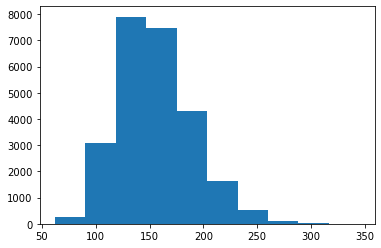

In [70]:
import matplotlib.pyplot as plt
plt.hist(lengths)

In [71]:
max(lengths)

345

In [72]:
np.median(lengths)

151.0

(array([4.9420e+03, 1.2457e+04, 5.2560e+03, 1.8310e+03, 5.5900e+02,
        1.7800e+02, 3.1000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 3. ,  8.2, 13.4, 18.6, 23.8, 29. , 34.2, 39.4, 44.6, 49.8, 55. ]),
 <a list of 10 Patch objects>)

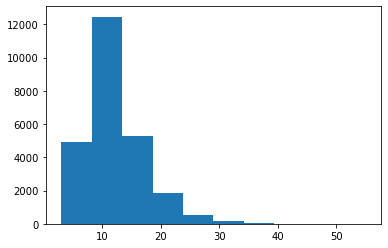

In [73]:
plt.hist(targ_lengths)

In [74]:
max(targ_lengths)

55

In [75]:
np.median(targ_lengths)

11.0

In [76]:
print(max_targ_len)
max_targ_len_eg

55


{'answer0': "The jealousy is burning me alive , I just ca n't stand my friend having what I ca n't have , depite the fact that I would have probably done it too if it was the other way around .",
 'answer1': "I do n't care one way or another about what my friend does .",
 'answer2': "I 'm glad my friend is respecting my wishes .",
 'answer3': 'None of the above choices .',
 'context': 'That is the one thing you just do not do out of respect for your friends feelings . Evidently the only person this person thinks about is themselves , And no one else . I wonder how they would have felt if I had dated one of their ex girlfriends that they still had feelings for . I guess when it comes right down to it , Things like this proves who your true friends are . I had told him over and over and over again how much I cared about and still loved this person , And that I had even hoped to get back with the person someday , And he obviously does not give a Damn about anyone but himself . I guess you